In [1]:
%load_ext autoreload
%autoreload 2
    
import numpy as np
from subprocess import getoutput
import requests
import sys
import ssl
import pandas as pd
from OpenSSL import crypto
import matplotlib.pyplot as plt
import pandas as pd
import os
from Crypto.PublicKey import RSA
from batch_gdc import *
from tqdm import tqdm

In [2]:
pd_key = pd.read_csv('../03/domeny_klucze.csv')
#pd_key = pd_key.dropna()

### Key to number

In [4]:
k = '-----BEGIN PUBLIC KEY-----\nMIIBIjANBgkqhkiG9w0BAQEFAAOCAQ8AMIIBCgKCAQEAubanqNe6xSQfWiszYK6E\nq/7AgBk8lWhyol87YWFU/sQU56lRRcBuUE6wzhNw8ZlyqbaTB+Lui0/JQ9qE0yIM\ngO9ll8Vy+5YgCDEHGevMQJF/TUAUM1yv1SWlTz0DO2+Yu0t8sjL9wDleqUbJ99PF\nChDxosgx+2STU4LC6o238znnTmw2OKz7UU1z1BpImaYw7jJLt89kU0LyNf2yWKNh\n7iHPD7adPjpaz0Cnc4JzLzESwlWYMPwVevFAwyYaT7CEm+RAjyQH/2gTC/cjD8od\nEliNHXDbRVMnFtgDvDccp4v5wKxG4fo+7WqFkEKjYrreUDw8M9SiRf00VTaqpXEH\n3wIDAQAB\n-----END PUBLIC KEY-----'
#k[30:-29]
k_int = int.from_bytes(k[27:-25].encode(),'little')

In [5]:
pub_key = RSA.importKey(k)

In [6]:
print('N',pub_key.n)
print('E',pub_key.e)

N 23444156916788217072968948797613723278925042381586582221140693672863149672676005620893979925204494030744622095025905422202071522522127578033612221016275813745156551118151270658253026197529489724236950117170556081137622165601495755640204329543647366736864367886398715741997966193998377964536823291966611064944123521230452486637382460409243307967480693978253936290404185984017525643259622532424222237847334527637929682299248260640852007183565826447648165000289210266187323013336594237477719650639394912377218794510735697325898093989060223722951869207292817471564468215796618201620610540272670321646987987450753140721631
E 65537


# BatchGCD

In [4]:
pd_key = pd_key.loc[pd_key['Key'].notnull()]
pd_key.head()
#pd_key.drop()

,Unnamed: 0,Domain,OpenRank,Key
0,0,mattpresti.com,5.56,b'-----BEGIN PUBLIC KEY-----\nMIIBIjANBgkqhkiG...
1,1,mattsteady.com,5.56,b'-----BEGIN PUBLIC KEY-----\nMIIBIjANBgkqhkiG...
2,2,maximalsound.com,5.56,b'-----BEGIN PUBLIC KEY-----\nMIIBIjANBgkqhkiG...
3,3,mayapuri.com,5.56,b'-----BEGIN PUBLIC KEY-----\nMIIBIjANBgkqhkiG...
4,4,mcphillipstoyota.com,5.56,b'-----BEGIN PUBLIC KEY-----\nMIIBIjANBgkqhkiG...


In [5]:
N = []
for ii, p in tqdm(pd_key.iterrows(), total=pd_key.shape[0]):
    try:
        key = p['Key'][2:-1].replace('\\n','\n')
        RSA_key = RSA.importKey(key)
        N.append(RSA_key.n)
    except:
        N.append(0)

100%|██████████| 167421/167421 [01:16<00:00, 2183.04it/s]


In [6]:
N = np.array(N)
zera = np.where(N==0)[0]
pd_key.drop(zera)

KeyError: '[    12     65     78 ... 167306 167408 167409] not found in axis'

In [7]:
#N = np.trim_zeros(N)
N = np.unique(N)
N = N[np.where(N!=0)[0]]
print(len(N))

72052


In [117]:
#pd_key['N'] = np.array(N).astype(np.str) #np.zeros(len(N)).astype(np.int32)

ValueError: Length of values does not match length of index

In [29]:
bath = batchgcd_faster(N[:100])

In [30]:
print(bath)

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]


In [41]:
import timeit
import time

In [50]:
times = []
items = [10, 100, 500, 1000, 2000, 3000, 4000, 5000]
for ii in items:
    start = time.time()
    bath = batchgcd_faster(N[:ii])
    end = time.time()
    t = (end - start)
    print(t)
    times.append(t)

0.001280069351196289
0.06329798698425293
1.1642775535583496
7.822126626968384
49.31683969497681
127.02600836753845
241.72007775306702
392.8998878002167


In [20]:

times = [0.001280069351196289, 0.06329798698425293, 1.1642775535583496, 7.822126626968384, 49.31683969497681, 127.02600836753845, 241.72007775306702, 392.8998878002167]
items = [10, 100, 500, 1000, 2000, 3000, 4000, 5000]

In [21]:
times = np.array(times)*1000
alpha = times[-1]/items[-1]**2
print(alpha)
estimated = np.array(items)**2 * alpha 

0.015715995512008668


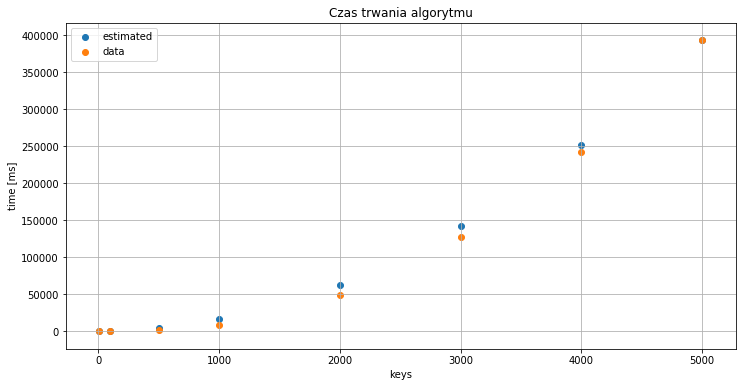

In [31]:

plt.figure(figsize=(12,6))
plt.scatter(items,estimated, label = 'estimated')
plt.scatter(items,times, label  = 'data')
plt.grid()
plt.title("Czas trwania algorytmu")
plt.xlabel("keys")
plt.ylabel('time [ms]')
plt.legend()

plt.savefig("time.png")
plt.show()

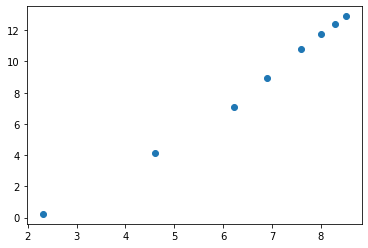

In [23]:
log_time = np.log(times)
log_items = np.log(items)
plt.scatter(log_items,log_time)

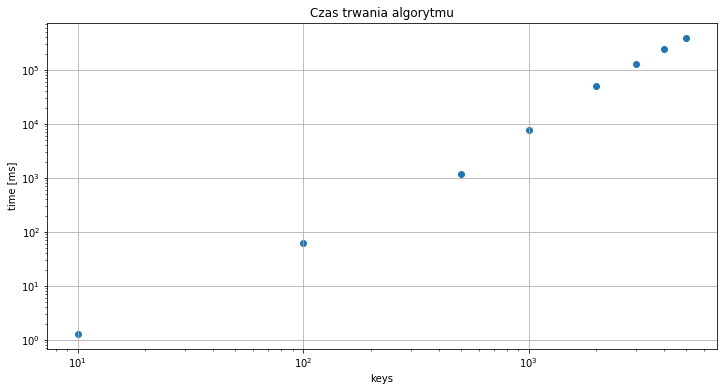

In [30]:
plt.figure(figsize=(12,6))
plt.scatter(items,times)
plt.title("Czas trwania algorytmu")
plt.xlabel("keys")
plt.ylabel('time [ms]')
plt.loglog()
plt.grid()
plt.savefig("logtime.png")